In [158]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [159]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

In [160]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)

In [161]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels)

In [162]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [163]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [164]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [165]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [166]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
16/16 [==============================] - 2s 76ms/step - loss: 2.7206 - accuracy: 0.5139 - val_loss: 1.7805 - val_accuracy: 0.6460
Epoch 2/10
16/16 [==============================] - 1s 63ms/step - loss: 1.4189 - accuracy: 0.7110 - val_loss: 1.3036 - val_accuracy: 0.7260
Epoch 3/10
16/16 [==============================] - 1s 62ms/step - loss: 1.0473 - accuracy: 0.7765 - val_loss: 1.1372 - val_accuracy: 0.7620
Epoch 4/10
16/16 [==============================] - 1s 62ms/step - loss: 0.8320 - accuracy: 0.8234 - val_loss: 1.0455 - val_accuracy: 0.7730
Epoch 5/10
16/16 [==============================] - 1s 62ms/step - loss: 0.6649 - accuracy: 0.8601 - val_loss: 0.9789 - val_accuracy: 0.7920
Epoch 6/10
16/16 [==============================] - 1s 59ms/step - loss: 0.5334 - accuracy: 0.8871 - val_loss: 0.9324 - val_accuracy: 0.8130
Epoch 7/10
16/16 [==============================] - 1s 60ms/step - loss: 0.4287 - accuracy: 0.9134 - val_loss: 0.9143 - val_accuracy: 0.8160
Epoch 8/10
16

In [167]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

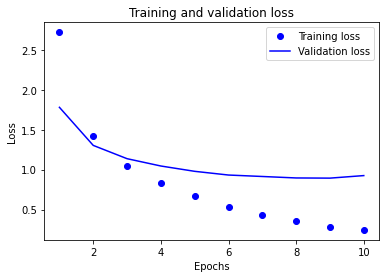

In [168]:
import matplotlib.pyplot as plt
  
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

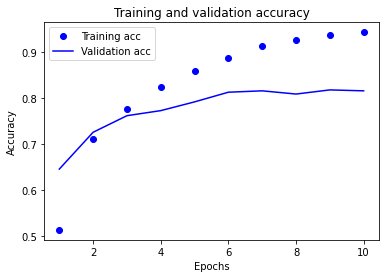

In [169]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [170]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))


Epoch 1/9
16/16 [==============================] - 2s 102ms/step - loss: 2.2680 - accuracy: 0.5911 - val_loss: 1.5020 - val_accuracy: 0.6830
Epoch 2/9
16/16 [==============================] - 1s 87ms/step - loss: 1.1531 - accuracy: 0.7712 - val_loss: 1.1493 - val_accuracy: 0.7570
Epoch 3/9
16/16 [==============================] - 1s 88ms/step - loss: 0.7950 - accuracy: 0.8430 - val_loss: 0.9703 - val_accuracy: 0.8030
Epoch 4/9
16/16 [==============================] - 1s 85ms/step - loss: 0.5843 - accuracy: 0.8846 - val_loss: 0.8888 - val_accuracy: 0.8160
Epoch 5/9
16/16 [==============================] - 1s 85ms/step - loss: 0.4444 - accuracy: 0.9118 - val_loss: 0.8666 - val_accuracy: 0.8090
Epoch 6/9
16/16 [==============================] - 1s 87ms/step - loss: 0.3457 - accuracy: 0.9306 - val_loss: 0.8378 - val_accuracy: 0.8250
Epoch 7/9
16/16 [==============================] - 1s 87ms/step - loss: 0.2768 - accuracy: 0.9415 - val_loss: 0.8176 - val_accuracy: 0.8320
Epoch 8/9
16/16 [==

In [171]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 6ms/step - loss: 0.9058 - accuracy: 0.8072


In [172]:
results

[0.9057925343513489, 0.8072128295898438]

In [173]:
predictions = model.predict(x_test)